In [5]:
import numpy as np
from math import sin
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
# Количество точек тестирования
N_point  = 1000

# Пользовательская функция с условными циклами
def myfunc(x,y):
    if (x>0.5*y and y<0.3):
        return (sin(x-y))
    elif (x<0.5*y):
        return 0
    elif (x>0.2*y):
        return (2*sin(x+2*y))
    else:
        return (sin(y+x))

In [3]:
# Список элементов, сфомированных по закону нормального распределения
lst_x = np.random.randn(N_point)
lst_y = np.random.randn(N_point)
lst_result = []

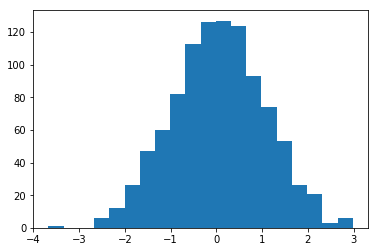

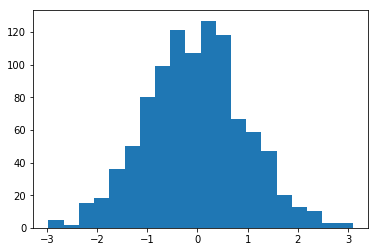

In [6]:
# Визуализация в виде графиков
plt.hist(lst_x,bins=20)
plt.show()
plt.hist(lst_y,bins=20)
plt.show()

In [9]:
# Сначала чистый for-loop
t1=time.time()
for i in range(len(lst_x)):
    x = lst_x[i]
    y= lst_y[i]
    if (x>0.5*y and y<0.3):
        lst_result.append(sin(x-y))
    elif (x<0.5*y):
        lst_result.append(0)
    elif (x>0.2*y):
        lst_result.append(2*sin(x+2*y))
    else:
        lst_result.append(sin(y+x))
t2=time.time()
print(
    "\nВремя, затраченное обычным for-loop\n{}\n{} us".format(
        '-'*47,1000000*(t2-t1)
    )
)


Время, затраченное обычным for-loop
-----------------------------------------------
8793.8308715820312 us


In [10]:
# Списковое выражение
print(
    "\nВремя, затраченное списковым выражением и zip()\n"+'-'*47
)
%timeit lst_result = [myfunc(x,y) for x,y in zip(lst_x,lst_y)]


Время, затраченное списковым выражением и zip()
-----------------------------------------------
3.16 ms ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
# Функция map()
print("\nВремя, затраченное функцией map()\n"+'-'*47)
%timeit list(map(myfunc,lst_x,lst_y))


Время, затраченное функцией map()
-----------------------------------------------
2.62 ms ± 7.92 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
# Метод Numpy.vectorize()
print("\nВремя, затраченное numpy.vectorize()\n"+'-'*47)
vectfunc = np.vectorize(myfunc,otypes=[np.float],cache=False)
%timeit list(vectfunc(lst_x,lst_y))


Время, затраченное numpy.vectorize()
-----------------------------------------------
1.89 ms ± 4.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Next example

In [14]:
from timeit import Timer

li = list(range(500000))
nump_arr = np.array(li)

def python_for():
    return [num + 1 for num in li]

def numpy_add():
    return nump_arr + 1

print(min(Timer(python_for).repeat(10, 10)))
print(min(Timer(numpy_add).repeat(10, 10)))

1.3113494790013647
0.027010416990378872
